In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
features = ["current_player_score",
            "opponent_score",
            "current_player_deadwood",
            "current_player_num_hit_cards",
            # alpha to here                 features[:4]
            "num_melds",
            "point_sum_melds",
            "num_combos",
            "point_sum_combos",
            "num_knock_cache",
            "point_sum_knock_cache",
            "num_load_cards",
            "point_sum_load_cards",
            "turns_taken"
            # beta to here                 features[:13]
           ]

In [39]:
df = pd.read_csv('alpha-3.csv')
df

,current_player,current_player_score,opponent_score,current_player_deadwood,current_player_num_hit_cards,is_current_player_hand_winner,is_current_player_game_winner
0,1,0,0,34,4,1,1
1,0,0,0,71,7,0,0
2,1,0,0,34,4,1,1
3,1,0,0,40,6,1,1
4,1,0,0,30,6,1,1
...,...,...,...,...,...,...,...
21071,1,38,83,30,6,0,0
21072,0,83,38,14,1,1,1
21073,0,83,38,15,1,1,1
21074,0,83,38,9,1,1,1


In [40]:
np.set_printoptions(edgeitems = 200, linewidth = 150)
df.values[0:20]

array([[ 1,  0,  0, 34,  4,  1,  1],
       [ 0,  0,  0, 71,  7,  0,  0],
       [ 1,  0,  0, 34,  4,  1,  1],
       [ 1,  0,  0, 40,  6,  1,  1],
       [ 1,  0,  0, 30,  6,  1,  1],
       [ 0,  0,  0, 71,  7,  0,  0],
       [ 0,  0,  0, 81, 10,  0,  0],
       [ 0,  0,  0, 71,  8,  0,  0],
       [ 1,  0,  0, 30,  6,  1,  1],
       [ 1,  0,  0, 31,  6,  1,  1],
       [ 1,  0,  0, 22,  5,  1,  1],
       [ 0,  0,  0, 71,  8,  0,  0],
       [ 0,  0,  0, 81,  8,  0,  0],
       [ 0,  0,  0, 71,  7,  0,  0],
       [ 1,  0,  0, 22,  5,  1,  1],
       [ 1,  0,  0, 27,  6,  1,  1],
       [ 1,  0,  0, 18,  6,  1,  1],
       [ 0,  0,  0, 71,  7,  0,  0],
       [ 0,  0,  0, 75,  7,  0,  0],
       [ 0,  0,  0, 65,  7,  0,  0]])

CSV LINE:

0.5875989200,0.0065548159,-0.0064843789,-0.0025769768,0.0019837560


R^2:   0.1847115660060077 




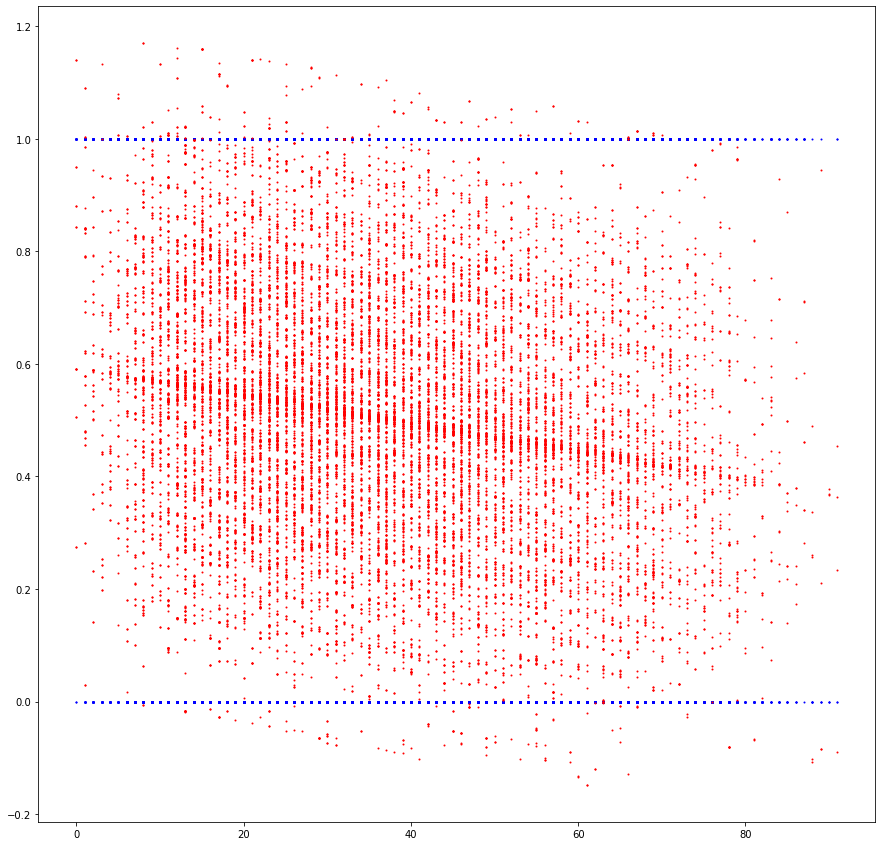

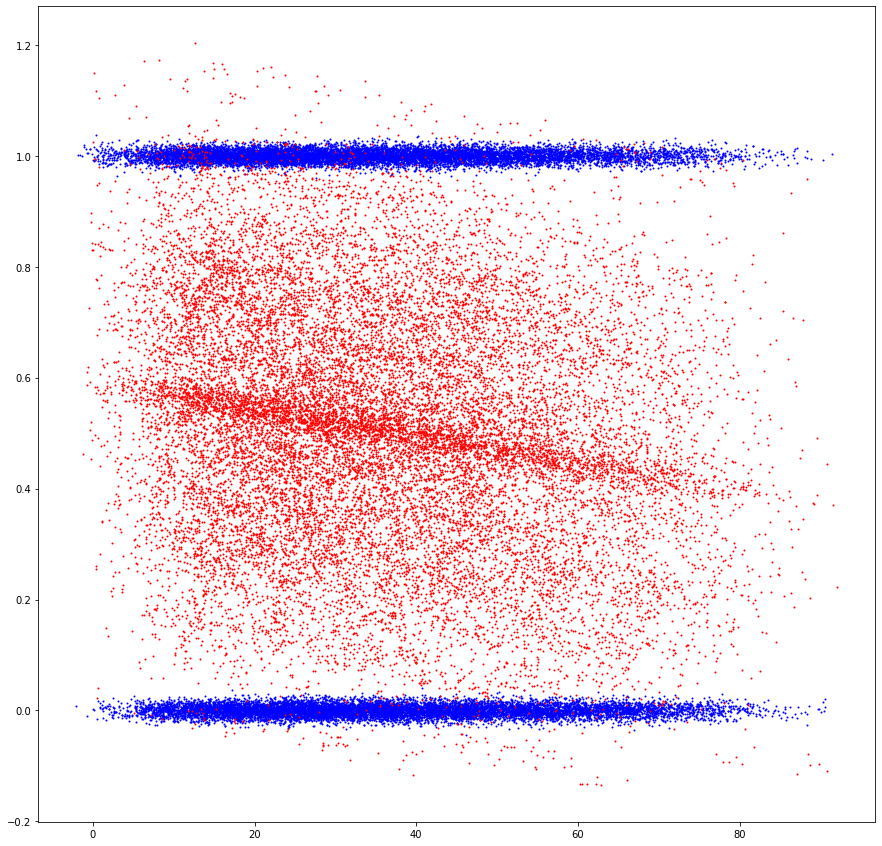

In [41]:
X = df[features[:4]]
y = df[["is_current_player_game_winner"]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
print(",".join('{0:.10f}'.format(num) for num in np.hstack((linear_regressor.intercept_,linear_regressor.coef_[0]))) + "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)



var = "current_player_deadwood"

fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

CSV LINE:

0.5610178517,0.0072864359,-0.0072952673,-0.0023478231,0.0058665511


R^2:   0.22464626892973727 




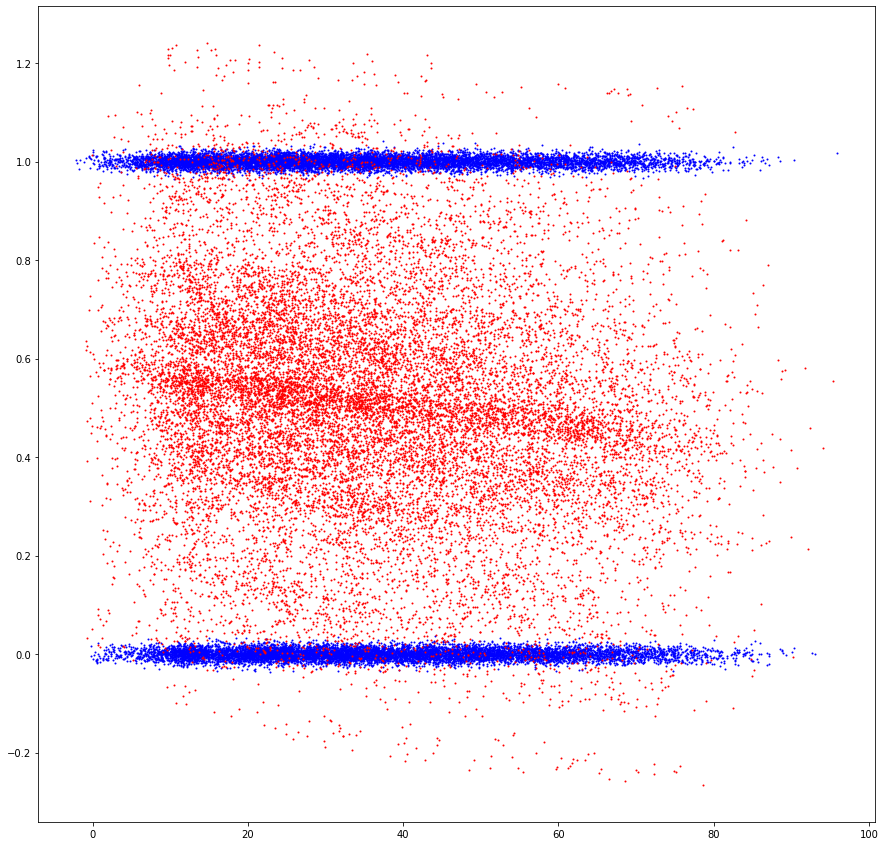

In [38]:
df = pd.read_csv('alpha-2.csv')
df

X = df[features[:4]]
y = df[["is_current_player_game_winner"]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
print(",".join('{0:.10f}'.format(num) for num in np.hstack((linear_regressor.intercept_,linear_regressor.coef_[0]))) + "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)



var = "current_player_deadwood"

def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

# logistic

In [22]:
X = df[["current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards","num_melds","point_sum_melds","num_combos","point_sum_combos","num_knock_cache","point_sum_knock_cache","num_load_cards","point_sum_load_cards","turns_taken"]]
y = df[["is_current_player_game_winner"]]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
model = LogisticRegression().fit(X_train, y_train.values.T[0])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
predictions = model.predict(X_test)

In [19]:
predictions

array([1, 1, 0, ..., 0, 0, 0])

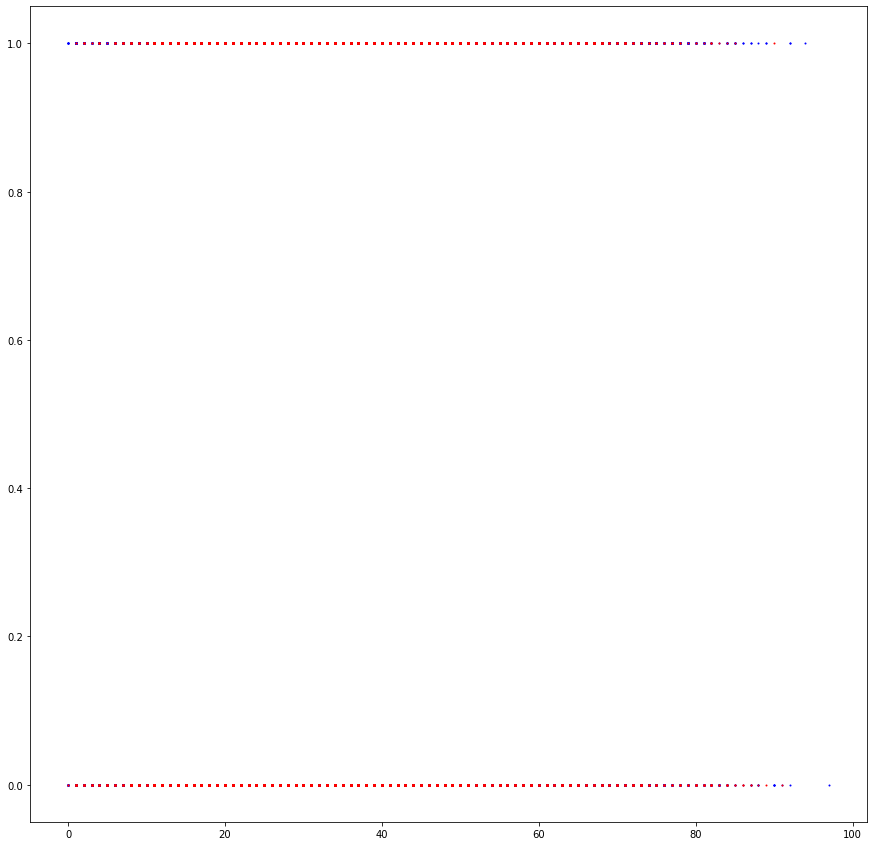

In [20]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

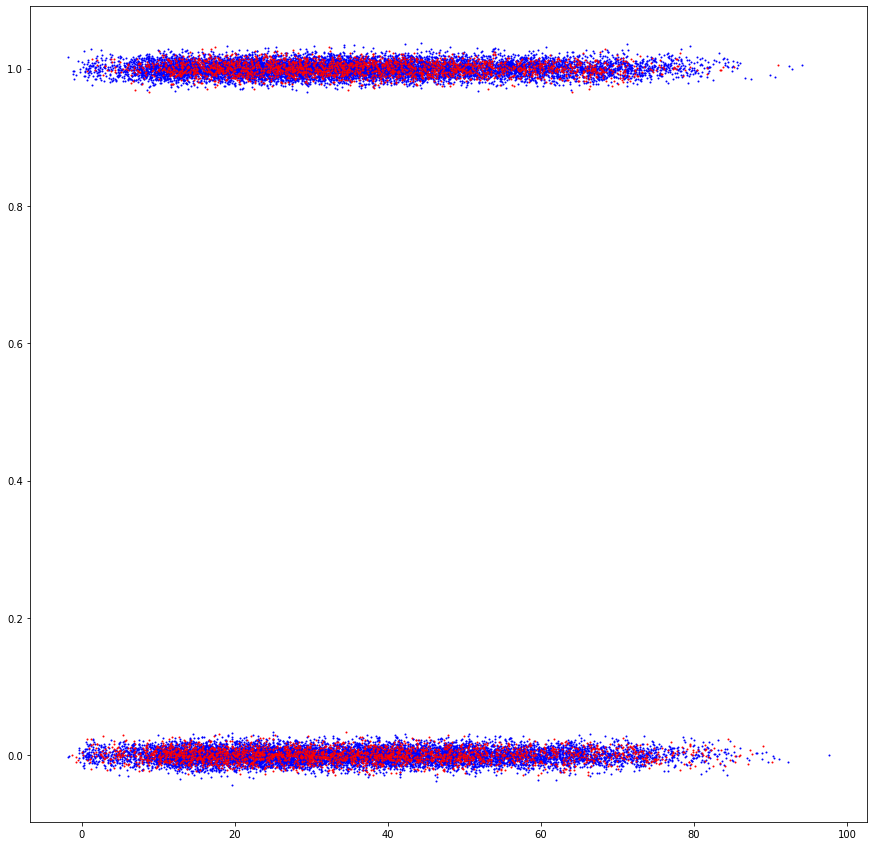

In [21]:
fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()